# Read hdf5 chunks 
* Velocity (m/s) data is read

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
filename = './OUTPUTS_CHUNKED/LosAlamos_ichunk_0.h5'

sep = '_'
NT = 10000
dt_output = 5e-3

In [3]:
sta_coords = pd.read_hdf(filename, key='Stations')
sta_coords

,Station,net,x,y,z
0,ACSM,EL,498494.600000,532877.900000,2042.684059
1,AMS,EL,501206.200000,531028.800000,1969.745468
2,BMSE,EL,497744.300000,543787.700000,2200.000000
3,ATE,EL,497744.300000,543787.700000,2152.000000
4,CDAB,EL,479540.966639,546778.780963,3081.414655
...,...,...,...,...,...
9995,LOS009910,EL,497200.000000,539765.000000,1609.028000
9996,LOS009911,EL,497200.000000,539120.000000,1609.051000
9997,LOS009912,EL,497200.000000,538505.000000,1609.173000
9998,LOS009913,EL,497200.000000,539255.000000,1609.227000


In [4]:
%%time 
ichunk = 0 # remove this!
data_xyz = []

print('Station number in this chunk: ', NSTA_chunk)
for compo in ['X', 'Y', 'Z']:
    print ('Component: ', compo)
    df = pd.read_hdf(filename, key='V'+sep+compo)
    data = df.values
    NSTA_chunk = int(data.shape[0]/NT)
    data_xyz.append(data.reshape(NSTA_chunk, NT))
    print()
print('*')

Component:  X
Station number in this chunk:  10000

Component:  Y
Station number in this chunk:  10000

Component:  Z
Station number in this chunk:  10000

*
CPU times: user 1.3 s, sys: 7.58 s, total: 8.87 s
Wall time: 50.2 s


<IPython.core.display.Javascript object>


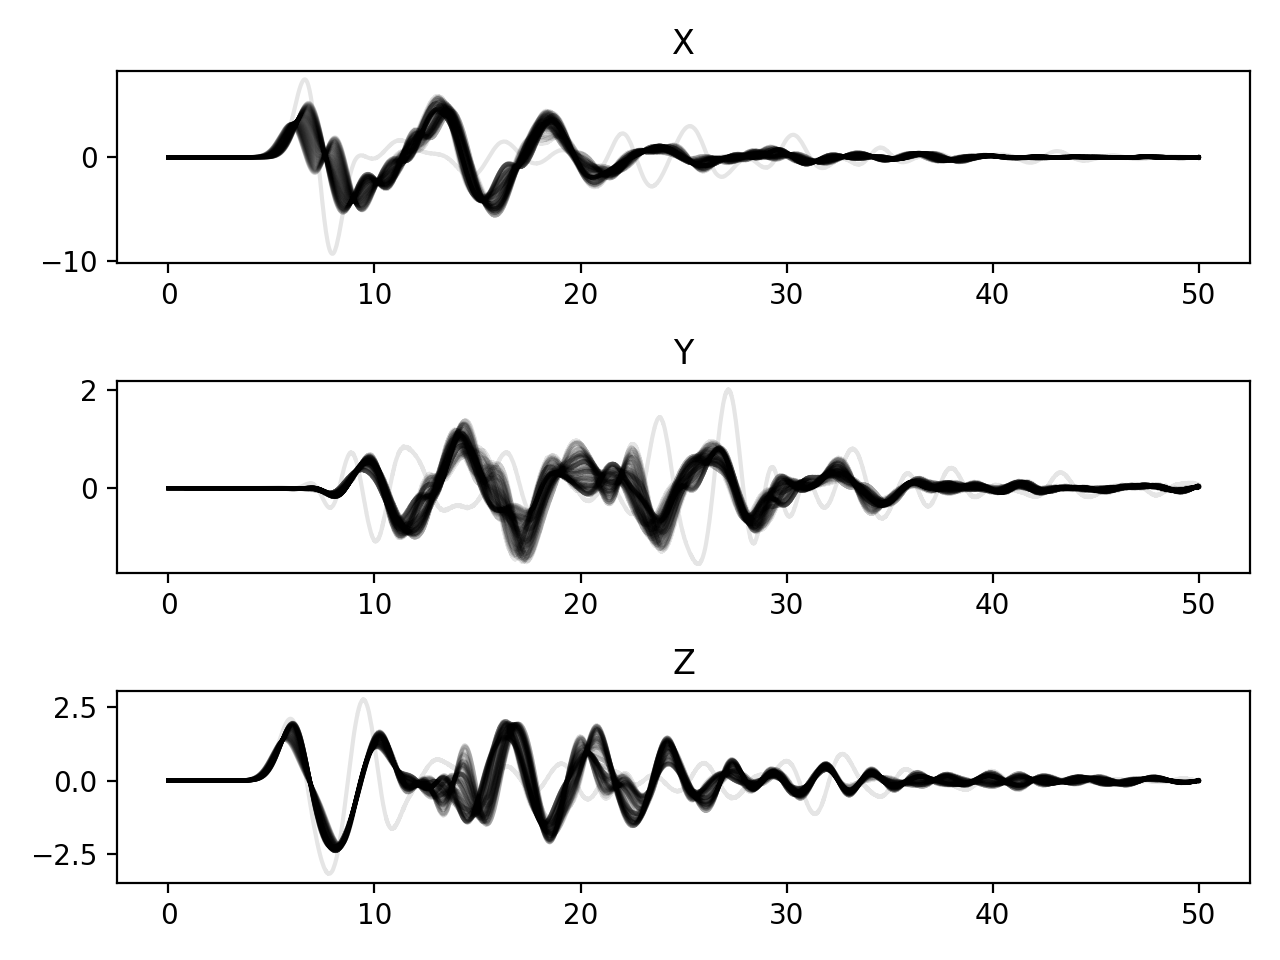

In [5]:
# quick check 
time = np.arange(NT)*dt_output

plt.subplot(311)
plt.title('X')
for ista in range(0,NSTA_chunk, 100):
    plt.plot(time, data_xyz[0][ista,:], 'k', alpha=0.1)
##

plt.subplot(312)
plt.title('Y')
for ista in range(0,NSTA_chunk, 100):
    plt.plot(time, data_xyz[1][ista,:], 'k', alpha=0.1)
##

plt.subplot(313)
plt.title('Z')
for ista in range(0,NSTA_chunk, 100):
    plt.plot(time, data_xyz[2][ista,:], 'k', alpha=0.1)
##

plt.tight_layout()